In [1]:
import os
import pandas as pd
import numpy as np

# Directories for the experiment results
geneformer_base_dir = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/outputs/2025-12-07_23-21_evaluate_all_shendure_geneformer_models_on_mid_quality_data"
scvi_base_dir = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/analysis/outputs/2025-12-08_22-15_reeval_scvis"

# The dataset, size, and relevant signals
experiment_configs = {
    "shendure": (10000000,
                 [1.0, 0.5414548, 0.2931733, 0.1587401, 0.0859506, 0.0465384, 0.0251984, 0.0136438, 0.0073875, 0.004],
                 ["author_day"])
}

algorithms = ["Geneformer", "SCVI"]

csv_path = "/home/igor/igor_repos/noise_scaling_laws/Scaling-up-measurement-noise-scaling-laws/collect_mi_results.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError("Could not find collect_mi_results.csv at expected location: " + csv_path)
mi_csv_df = pd.read_csv(csv_path)
if 'quality' not in mi_csv_df.columns:
    raise RuntimeError("Expected column 'quality' in the MI results CSV for quality (bvalue).")
mi_csv_df = mi_csv_df.rename(columns={'quality': 'bvalue'})
mi_csv_df['bvalue'] = pd.to_numeric(mi_csv_df['bvalue'], errors='coerce')
mi_csv_df['signal'] = mi_csv_df['signal'].astype(str)
mi_csv_df['algorithm'] = mi_csv_df['algorithm'].astype(str)
mi_csv_df = mi_csv_df[['dataset', 'size', 'bvalue', 'signal', 'algorithm', 'mi_value']].copy()

records = []
for dataset, (size, bvalues, signals) in experiment_configs.items():
    for bvalue in bvalues:
        for signal in signals:
            for algo in algorithms:
                seed = 42
                if algo == "Geneformer":
                    base_dir = geneformer_base_dir
                    path_high_quality_eval = f"{base_dir}/{dataset}/{size}/{bvalue}/results/{algo}/model/MI/{seed}/Y_{signal}_1.0_{algo.lower()}"
                    file_high_quality_eval = os.path.join(path_high_quality_eval, "lmi_mutual_information.txt")
                elif algo == "SCVI":
                    base_dir = scvi_base_dir
                    path_high_quality_eval = f"{base_dir}/{dataset}/{size}/{bvalue}/results/{algo}/model/MI/{seed}/Y_{signal}_1.0"
                    file_high_quality_eval = os.path.join(path_high_quality_eval, "lmi_mutual_information.txt")
                else:
                    continue
                lmi_new_high_quality_eval = None
                if os.path.exists(file_high_quality_eval):
                    try:
                        with open(file_high_quality_eval, "r") as f:
                            lmi_new_high_quality_eval = f.read().strip()
                    except Exception:
                        lmi_new_high_quality_eval = None
                mask = (
                    (mi_csv_df['dataset'] == dataset) &
                    (mi_csv_df['size'] == size) &
                    (np.isclose(mi_csv_df['bvalue'], bvalue, rtol=1e-7, atol=1e-10)) &
                    (mi_csv_df['signal'] == str(signal)) &
                    (mi_csv_df['algorithm'] == str(algo))
                )
                sub_df = mi_csv_df.loc[mask]
                lmi_orig_val = sub_df['mi_value'].values[0] if not sub_df.empty else np.nan

                records.append({
                    "dataset": dataset,
                    "size": size,
                    "bvalue": bvalue,
                    "signal": signal,
                    "algorithm": algo,
                    "lmi_new_high_quality_eval": lmi_new_high_quality_eval,
                    "lmi_original_same_quality_eval": lmi_orig_val
                })

merged_df = pd.DataFrame(records)
merged_df['lmi_new_high_quality_eval'] = pd.to_numeric(merged_df['lmi_new_high_quality_eval'], errors='coerce')
merged_df['lmi_original_same_quality_eval'] = pd.to_numeric(merged_df['lmi_original_same_quality_eval'], errors='coerce')
merged_df.at[1, "lmi_new_high_quality_eval"] = 2.44841

# --- Save results for reuse ---
results_save_path = "2025-12-08_23-33_generate_new_scaling_curves_geneformer_and_scvi_results.csv"
merged_df.to_csv(results_save_path, index=False)
print(f"Results DataFrame saved to {results_save_path}")

merged_df

Results DataFrame saved to 2025-12-08_23-33_generate_new_scaling_curves_geneformer_and_scvi_results.csv


,dataset,size,bvalue,signal,algorithm,lmi_new_high_quality_eval,lmi_original_same_quality_eval
0,shendure,10000000,1.000000,author_day,Geneformer,1.92699,1.95532
1,shendure,10000000,1.000000,author_day,SCVI,2.44841,2.44841
2,shendure,10000000,0.541455,author_day,Geneformer,1.85850,1.82958
3,shendure,10000000,0.541455,author_day,SCVI,2.47795,2.33247
4,shendure,10000000,0.293173,author_day,Geneformer,2.05358,1.86047
5,shendure,10000000,0.293173,author_day,SCVI,2.38989,2.16345
6,shendure,10000000,0.158740,author_day,Geneformer,1.89000,1.73789
7,shendure,10000000,0.158740,author_day,SCVI,2.30624,2.02290
8,shendure,10000000,0.085951,author_day,Geneformer,1.77112,1.41682
9,shendure,10000000,0.085951,author_day,SCVI,2.21306,1.84146


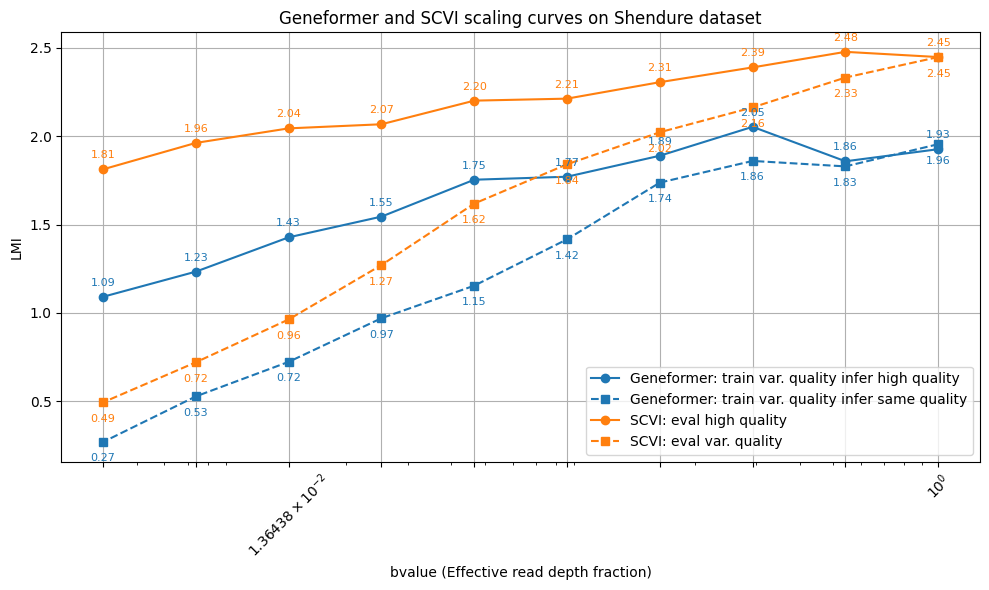

In [ ]:
import matplotlib.pyplot as plt

# Only select rows for shendure, just in case we have more datasets in the future
df = merged_df[merged_df['dataset'] == 'shendure'].copy()

# For plotting, ensure the bvalue is sorted descending (from 1.0 to low)
df = df.sort_values('bvalue', ascending=False)

# Convert None and missing/NaN to np.nan for plotting
def safe_float(x):
    try:
        if x is None:
            return float('nan')
        return float(x)
    except Exception:
        return float('nan')

df['lmi_new_high_quality_eval'] = df['lmi_new_high_quality_eval'].apply(safe_float)
df['lmi_original_same_quality_eval'] = df['lmi_original_same_quality_eval'].apply(safe_float)

# Separate dataframes for each algorithm for easier plotting and annotation
df_geneformer = df[df['algorithm'] == 'Geneformer']
df_scvi = df[df['algorithm'] == 'SCVI']

plt.figure(figsize=(10, 6))

# Define colors manually for algorithm consistency
geneformer_color = "#1f77b4"  # matplotlib default blue
scvi_color = "#ff7f0e"        # matplotlib default orange

# Geneformer
plt.plot(df_geneformer['bvalue'], df_geneformer['lmi_new_high_quality_eval'],
         marker='o', linestyle='-', color=geneformer_color, label='Geneformer: train var. quality infer high quality')
plt.plot(df_geneformer['bvalue'], df_geneformer['lmi_original_same_quality_eval'],
         marker='s', linestyle='--', color=geneformer_color, label='Geneformer: train var. quality infer same quality')

# SCVI
plt.plot(df_scvi['bvalue'], df_scvi['lmi_new_high_quality_eval'],
         marker='o', linestyle='-', color=scvi_color, label='SCVI: train var. quality infer high quality')
plt.plot(df_scvi['bvalue'], df_scvi['lmi_original_same_quality_eval'],
         marker='s', linestyle='--', color=scvi_color, label='SCVI: train var. quality infer same quality')

# Add value annotation for each point, using corresponding line color and rounded to 2 decimals
for i, (x, y) in enumerate(zip(df_geneformer['bvalue'], df_geneformer['lmi_new_high_quality_eval'])):
    if not pd.isna(y):
        plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),
                     ha='center', color=geneformer_color, fontsize=8)
for i, (x, y) in enumerate(zip(df_geneformer['bvalue'], df_geneformer['lmi_original_same_quality_eval'])):
    if not pd.isna(y):
        plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,-14),
                     ha='center', color=geneformer_color, fontsize=8)

for i, (x, y) in enumerate(zip(df_scvi['bvalue'], df_scvi['lmi_new_high_quality_eval'])):
    if not pd.isna(y):
        plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),
                     ha='center', color=scvi_color, fontsize=8)
for i, (x, y) in enumerate(zip(df_scvi['bvalue'], df_scvi['lmi_original_same_quality_eval'])):
    if not pd.isna(y):
        plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,-14),
                     ha='center', color=scvi_color, fontsize=8)

plt.xlabel('bvalue (Effective read depth fraction)')
plt.ylabel('LMI')
plt.title('Geneformer and SCVI scaling curves on Shendure dataset')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xticks(df['bvalue'].unique(), rotation=45)
plt.tight_layout()
plt.show()
